In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

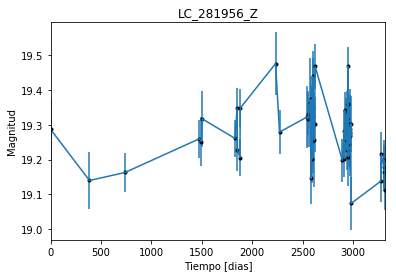

In [2]:
data = np.genfromtxt('LC_281956_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_281956_Z')
plt.savefig("LC_281956_Z.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

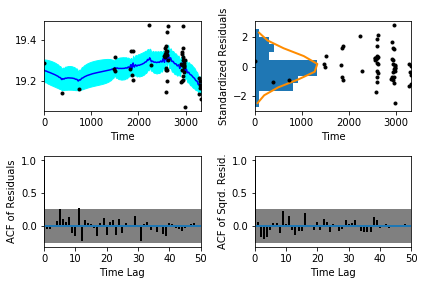

In [5]:
sample.assess_fit()

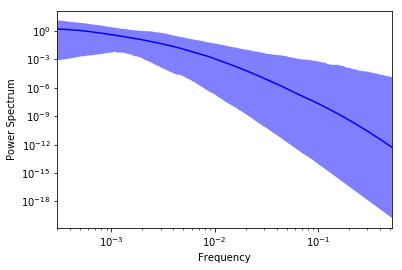

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

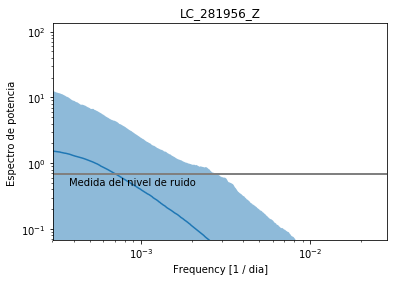

In [9]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_281956_Z')
plt.savefig("Medida del nivel de ruido_Z.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_281956_Z')

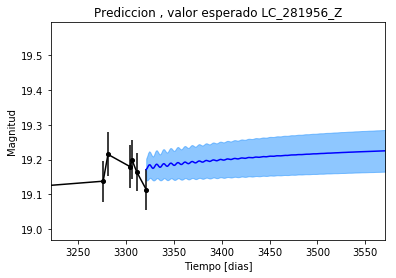

In [10]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_281956_Z')

Text(0.5,1,'Prediccion, Caminos simulados_LC_281956_Z')

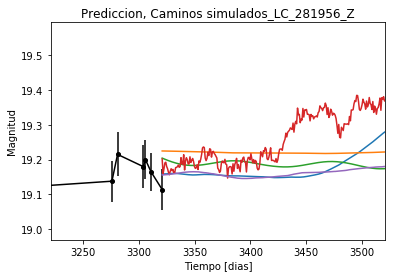

In [11]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados_LC_281956_Z')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


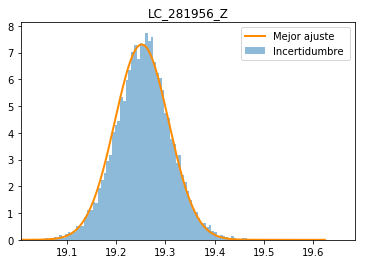

In [12]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_281956_Z')
plt.savefig("Mejor_ajuste_LC_281956_Z.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_281956_Z')

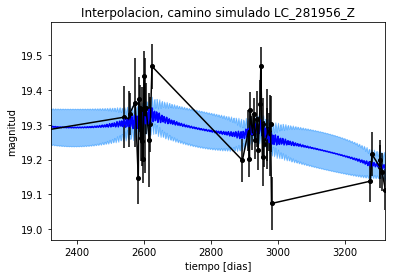

In [13]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_Z')

Text(0.5,1,'Interpolacion, camino simulado LC_281956_Z')

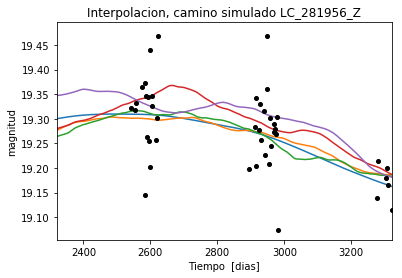

In [14]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_281956_Z')

In [15]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [16]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 535.282899988
Median: 0.0101017293501
Standard deviation: 0.201226971328
68% credibility interval: [ 0.00080538  0.20795683]
95% credibility interval: [  3.39626834e-04   7.84273344e-01]
99% credibility interval: [  3.07514604e-04   9.59282171e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 629.921244537
Median: 0.00149140939497
Standard deviation: 0.0633803743199
68% credibility interval: [ 0.00042537  0.01752116]
95% credibility interval: [ 0.00031673  0.19597979]
99% credibility interval: [  3.03508687e-04   4.88586961e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 624.061192327
Median: 0.0296717572013
Standard 

In [17]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1284.06350581
Median: 83.3622420637
Standard deviation: 1.58921476245
68% credibility interval: [ 81.50428594  84.4841127 ]
95% credibility interval: [ 79.14047976  85.07799408]
99% credibility interval: [ 77.12865685  85.26576886]


In [18]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 666.391469413
Median: 0.788477927958
Standard deviation: 2.22475350087
68% credibility interval: [ 0.07118628  4.27693255]
95% credibility interval: [ 0.01497763  7.29885652]
99% credibility interval: [ 0.0100821   9.59125228]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 740.854788115
Median: 0.371207878129
Standard deviation: 8.63517047298
68% credibility interval: [ 0.01083282  6.73727007]
95% credibility interval: [  6.47888180e-0

In [19]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1405.10203841
Median: 1.97913597137e-40
Standard deviation: 2.70127438383e+96
68% credibility interval: [  6.34427387e-87   5.02839089e-06]
95% credibility interval: [  3.06526950e-118   1.80371881e+060]
99% credibility interval: [  4.22984676e-139   7.67921486e+084]


In [20]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2323.67941732
Median: 19.2543487912
Standard deviation: 0.0359611829166
68% credibility interval: [ 19.22129465  19.28213819]
95% credibility interval: [ 19.17020793  19.31594542]
99% credibility interval: [ 19.1352896   19.35992911]


In [21]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 510.797166883
Median: 0.00283413562761
Standard deviation: 0.233378514393
68% credibility interval: [ 0.          0.24439048]
95% credibility interval: [ 0.          0.91991237]
99% credibility interval: [ 0.          1.00662203]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 510.797166883
Median: 0.00283413562761
Standard deviation: 0.233378514393
68% credibility interval: [ 0.          0.24439048]
95% credibility interval: [ 0.          0.91991237]
99% credibility interval: [ 0.          1.00662203]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 558.747890627
Median: 0.0
Standard deviation: 0.0272400602079
68% cr

In [22]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1284.06350581
Median: 83.3622420637
Standard deviation: 1.58921476245
68% credibility interval: [ 81.50428594  84.4841127 ]
95% credibility interval: [ 79.14047976  85.07799408]
99% credibility interval: [ 77.12865685  85.26576886]


In [23]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 2011.42292044
Median: 0.00399011141866
Standard deviation: 0.00582835693576
68% credibility interval: [ 0.00185379  0.00858853]
95% credibility interval: [ 0.00080879  0.02062856]
99% credibility interval: [ 0.00037942  0.03537059]


In [24]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 2379.423438
Median: 1.13093229008
Standard deviation: 0.171952668255
68% credibility interval: [ 0.9832398   1.31274904]
95% credibility interval: [ 0.8523775   1.52196432]
99% credibility interval: [ 0.76696753  1.68481647]


In [25]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 656.286336201
Median: 2.33111874643e-05
Standard deviation: 0.308876154912
68% credibility interval: [  5.48616913e-08   1.83408401e-03]
95% credibility interval: [  1.44184154e-63   4.98860389e-02]
99% credibility interval: [  8.13806507e-89   4.09847338e-01]


In [26]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 535.282899988
Median: (-0.0634710374298-0.716515411456j)
Standard deviation: 1.93617785055
68% credibility interval: [-1.30663128+0.j         -0.00506037-0.05389654j]
95% credibility interval: [ -4.92773475e+00+0.j          -2.13393833e-03-0.00133013j]
99% credibility interval: [ -6.02734764e+00+0.j          -1.93217124e-03-0.00493304j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 629.921244537
Median: (-0.00937080159748+0j)
Standard deviation: 1.51947379611
68% credibility interval: [-0.11008872+0.56022733j -0.00267266+0.00259755j]
95% credibility interval: [-1.23137734 +2.18351435e+00j -0.00199004 +9.07728430e-04j]
99% credibility interval: [ -3.06988241e+00+4.73650553j  -1.90700132e-03+0.j        ]
Posterior summ